# Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras import models, layers

In [17]:
df=pd.read_csv('base_caracucho_viento_humedad.csv')
print(df.head())

   Dia  Mes   Ano  Caudal_Diario        date     chirps     chirts    viento  \
0   30    6  1983           33.0  1983-06-30  13.026489  31.285686  1.199997   
1    1    7  1983           55.4  1983-07-01  28.323709  31.395732 -0.300003   
2    2    7  1983           72.4  1983-07-02  19.733653  32.389851 -0.300003   
3    3    7  1983           56.7  1983-07-03  15.747638  31.664541 -1.000000   
4    4    7  1983           43.8  1983-07-04   3.056584  30.835341 -0.599991   

   humedad      lon.x  ...  temp_lag_4m  temp_lag_5m  temp_lag_6m  \
0   0.0193 -83.203328  ...    31.256947    32.610392    32.522633   
1   0.0191 -83.203328  ...    31.230596    31.256947    32.610392   
2   0.0188 -83.203328  ...    32.736603    31.230596    31.256947   
3   0.0191 -83.203328  ...    33.441345    32.736603    31.230596   
4   0.0192 -83.203328  ...    31.285686    33.441345    32.736603   

   prep_lag_1m  prep_lag_2m  prep_lag_3m  prep_lag_4m  prep_lag_5m  \
0     9.911792    16.141185    12.

In [26]:
df = df.dropna()

In [27]:
datetime = df["date"]  

x=df[["chirts","chirps", "NINO3.4", "viento", "humedad", 
                            "caudal_lag_1m", "caudal_lag_2m", "caudal_lag_3m",
                            "caudal_lag_4m", "caudal_lag_5m", "caudal_lag_6m",
                            "temp_lag_2m", "temp_lag_3m", "temp_lag_4m", 
                            "temp_lag_5m", "temp_lag_6m", 
                            "prep_lag_1m", "prep_lag_2m", "prep_lag_3m", 
                            "prep_lag_4m", "prep_lag_5m", "prep_lag_6m"]]
y=df["Caudal_Diario"]

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

x_esc = scaler_X.fit_transform(x)
y_esc = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [28]:
print(df.isna().sum())

Dia              0
Mes              0
Ano              0
Caudal_Diario    0
date             0
chirps           0
chirts           0
viento           0
humedad          0
lon.x            0
lat.x            0
lon.y            0
lat.y            0
caudal_lag_1m    0
caudal_lag_2m    0
caudal_lag_3m    0
caudal_lag_4m    0
caudal_lag_5m    0
caudal_lag_6m    0
temp_lag_2m      0
temp_lag_3m      0
temp_lag_4m      0
temp_lag_5m      0
temp_lag_6m      0
prep_lag_1m      0
prep_lag_2m      0
prep_lag_3m      0
prep_lag_4m      0
prep_lag_5m      0
prep_lag_6m      0
NINO3.4          0
dtype: int64


In [29]:
# Asegurarse de que los datos sean float32
x_esc = x_esc.astype('float32')
y_esc = y_esc.astype('float32')

In [ ]:
# # Definir el modelo con inicialización y activación adecuadas
# oculta1 = tf.keras.layers.Dense(units=23, activation='relu', input_shape=(20,), kernel_initializer='he_normal')
# oculta2 = tf.keras.layers.Dense(units=23, activation='relu', kernel_initializer='he_normal')
# oculta3 = tf.keras.layers.Dense(units=23, activation='relu', kernel_initializer='he_normal')
# salida = tf.keras.layers.Dense(units=1)

In [30]:
# Definir el modelo
modelo = models.Sequential([
    layers.InputLayer(input_shape=(22,)),  # 22 características de entrada
    layers.Dense(64, activation='relu'),   # Capa oculta 1
    layers.Dense(32, activation='relu'),   # Capa oculta 2
    layers.Dense(16, activation='relu'),   # Capa oculta 3
    layers.Dense(1)                        # Capa de salida (una neurona para regresión)
])

# Compilar el modelo con tasa de aprendizaje más baja
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mean_squared_error"
)

# Entrenamiento con batch_size más pequeño
historial = modelo.fit(x_esc, y_esc, epochs=200, batch_size=16, verbose=True)


Epoch 1/200


c:\Users\Usuario\Desktop\CIMPA\Codigo\Caracucho\venv\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0047   
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025    
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014  
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011      
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.0013  
Epoch 6/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.0010    
Epoch 7/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011      
Epoch 8/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.0011
Epoch 9/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.8704e-04  
Epoch 10/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 9.8787e-04
Epoch 11/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.5761e-04  
Epoch 12/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010    
Epoch 13/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.0104e-04  
Epoch 14/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1038e-04  
Epoch 15/200
98/

In [33]:
# modelo = tf.keras.Sequential([oculta1, oculta2, oculta3, salida])

# # Compilar el modelo con tasa de aprendizaje más baja
# modelo.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#     loss="mean_squared_error"
# )

# # Entrenamiento con batch_size más pequeño
# historial = modelo.fit(x_esc, y_esc, epochs=200, batch_size=16, verbose=True)


In [31]:
print(x_esc.shape)
print(y_esc.shape)


(1560, 22)
(1560, 1)


In [32]:
print(np.min(x_esc), np.max(x_esc))
print(np.min(y_esc), np.max(y_esc))

0.0 1.0
0.0 1.0


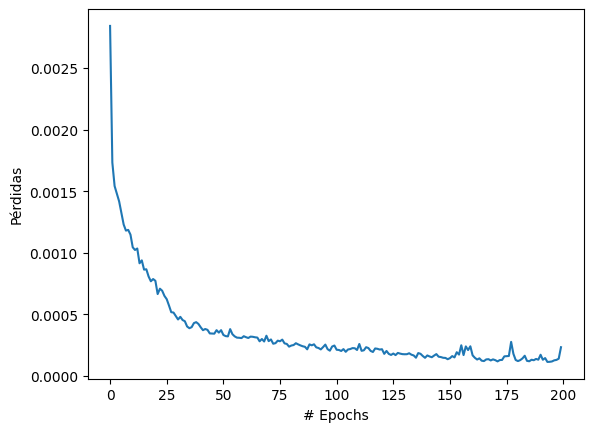

In [33]:
import matplotlib.pyplot as plt
plt.xlabel("# Epochs")
plt.ylabel("Pérdidas")
plt.plot(historial.history["loss"])

In [34]:
predictions_scaled = modelo.predict(x_esc)
predictions = scaler_y.inverse_transform(predictions_scaled).flatten()

y_test_pred = predictions

# Evaluar métricas
rmse = np.sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)


print(f"R²: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R²: 0.9373593545726441
RMSE: 15.979687097066815
MAE: 11.320347349704841


In [35]:
mean_real = y.mean()

# Calcular rendimiento en porcentaje
rendimiento = 100 * (1 - (mae / mean_real))

print(f"MAE: {mae:.2f}")
print(f"Rendimiento del modelo: {rendimiento:.2f}%")

MAE: 11.32
Rendimiento del modelo: 83.57%


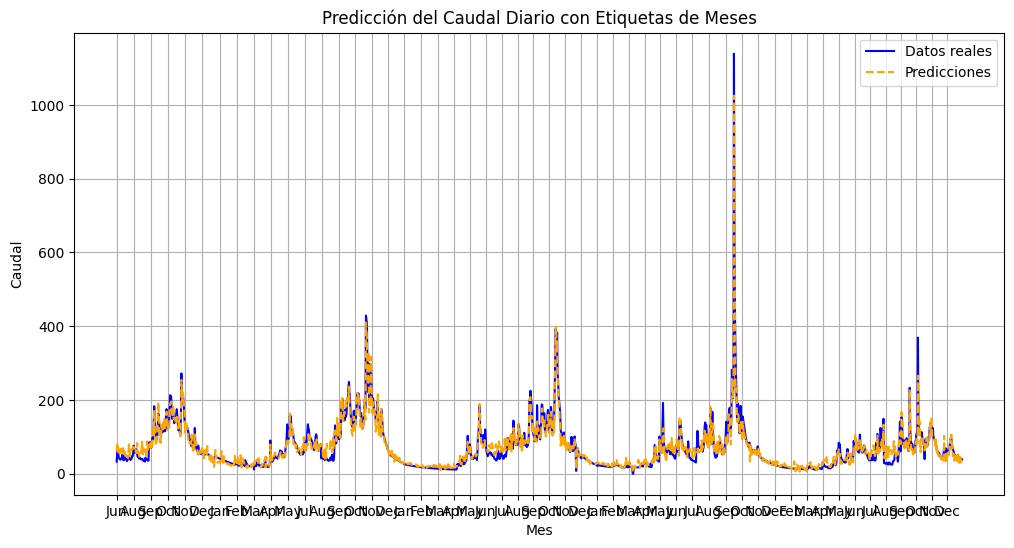

In [39]:
# Asegurar que la columna datetime es de tipo fecha
df["datetime"] = pd.to_datetime(df["date"])

# Definir variables correctamente
datetime = df["datetime"]
y = df["Caudal_Diario"]

# Crear DataFrames con las fechas correctas
y_test_grouped = pd.DataFrame({'datetime': datetime, 'Real': y}).groupby('datetime').mean()
predictions_grouped = pd.DataFrame({'datetime': datetime, 'Prediccion': predictions}).groupby('datetime').mean()

# Fusionar datos
resultados = y_test_grouped.merge(predictions_grouped, left_index=True, right_index=True)

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(resultados.index, resultados['Real'], label='Datos reales', color='blue')
plt.plot(resultados.index, resultados['Prediccion'], label='Predicciones', color='orange', linestyle='dashed')

# Configurar etiquetas del eje X con nombres de los meses
plt.xticks(ticks=resultados.index[::30], labels=resultados.index[::30].strftime('%b'))

# Agregar títulos y etiquetas
plt.title('Predicción del Caudal Diario con Etiquetas de Meses')
plt.xlabel('Mes')
plt.ylabel('Caudal')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

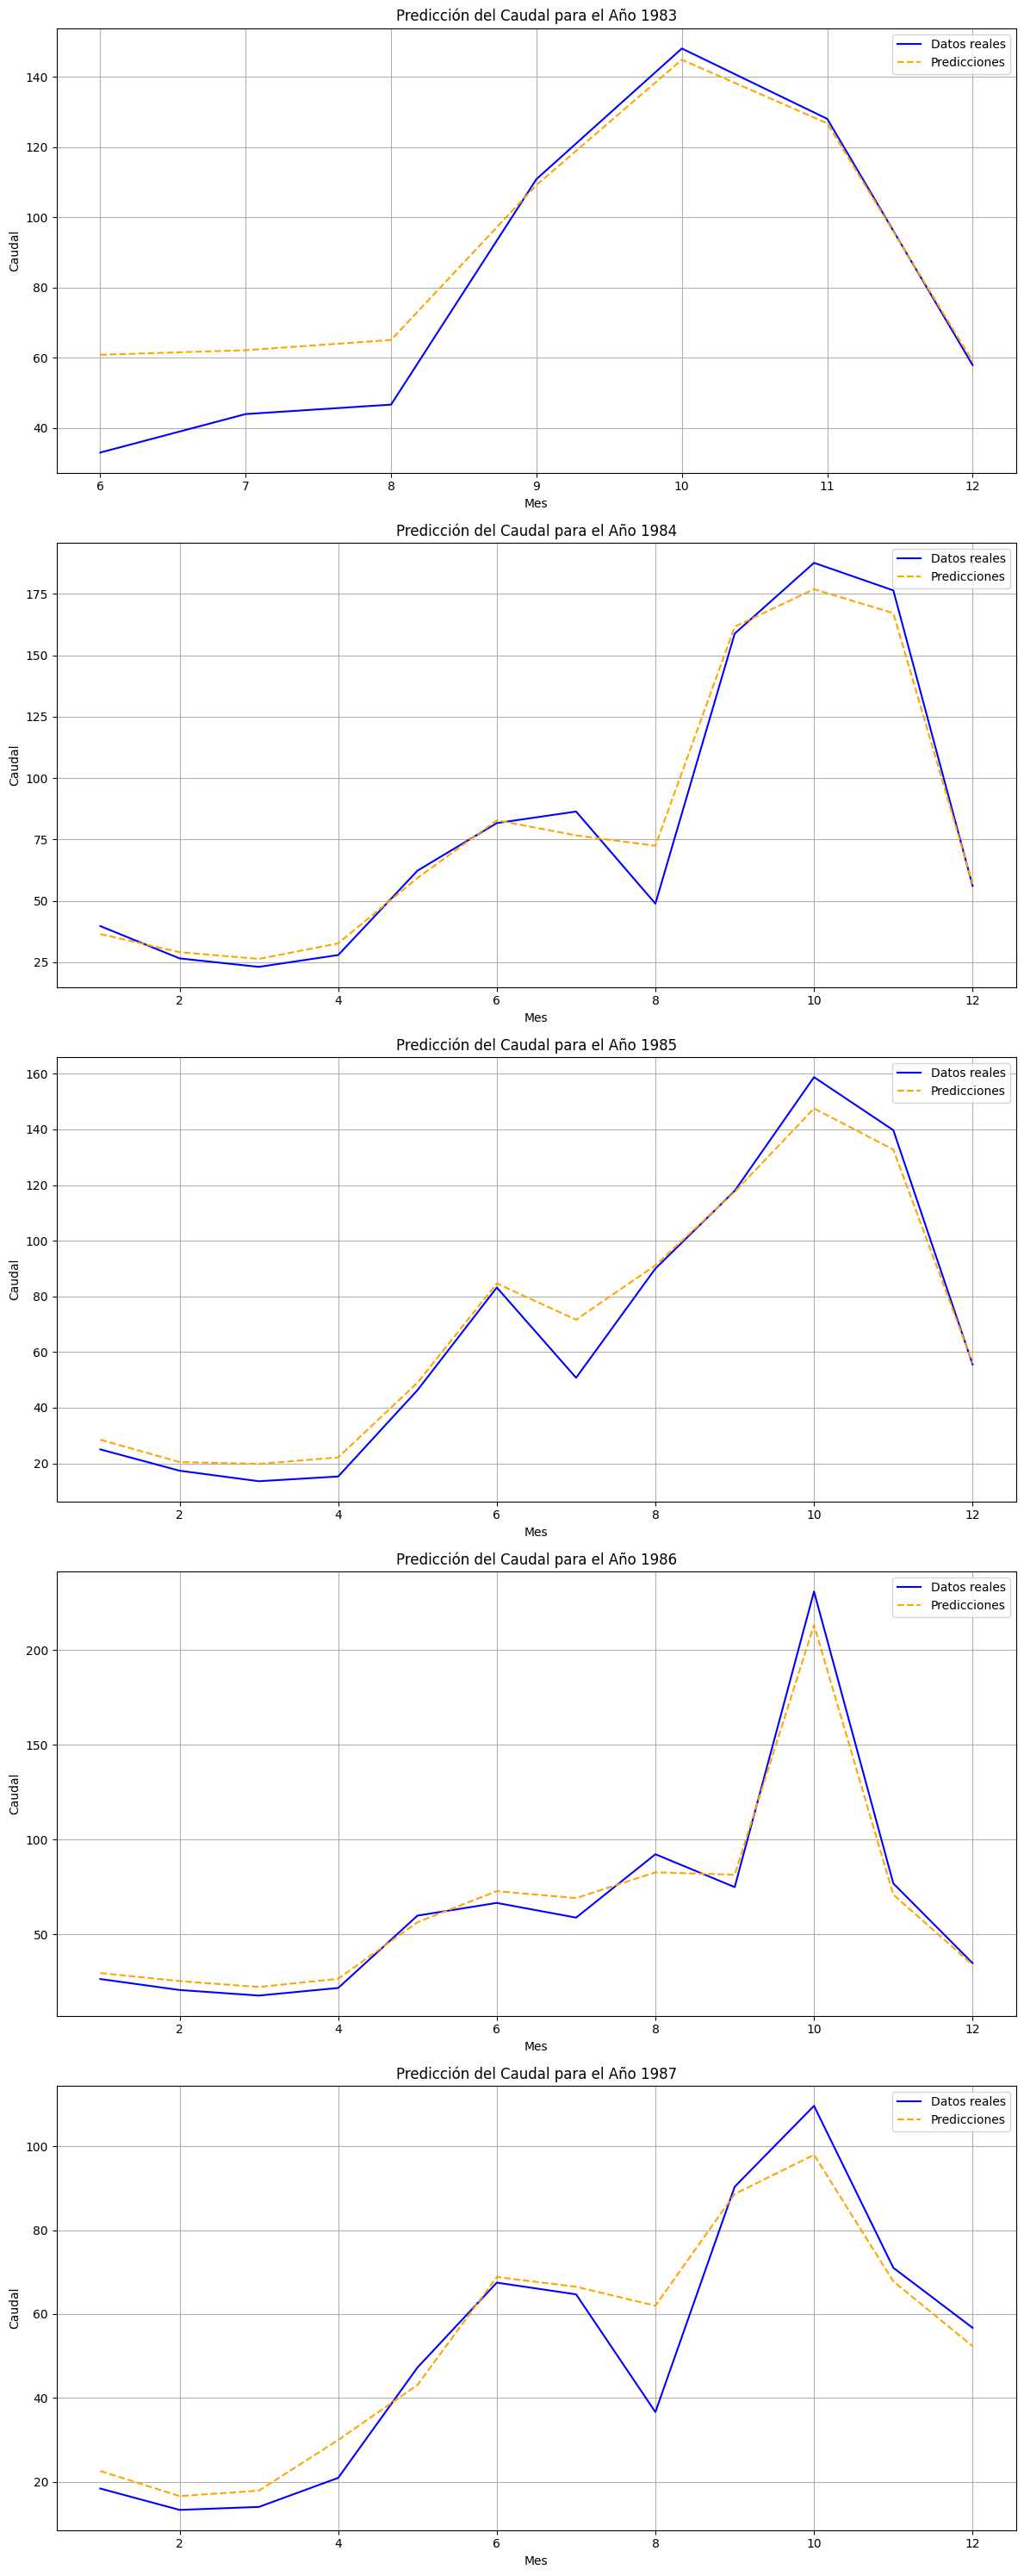

In [ ]:


# Crear DataFrames con las fechas y valores correspondientes
y_test_grouped = pd.DataFrame({'datetime': df["datetime"], 'Real': df["Caudal_Diario"]})
predictions_grouped = pd.DataFrame({'datetime': df["datetime"], 'Prediccion': predictions})

# Agrupar por año (extraemos el año de datetime)
y_test_grouped['Year'] = y_test_grouped['datetime'].dt.year
predictions_grouped['Year'] = predictions_grouped['datetime'].dt.year

# Agrupar los datos por año y calcular la media
y_test_grouped = y_test_grouped.groupby(['Year', y_test_grouped['datetime'].dt.month]).mean()
predictions_grouped = predictions_grouped.groupby(['Year', predictions_grouped['datetime'].dt.month]).mean()

# Fusionar los DataFrames por el índice de año y mes
resultados = y_test_grouped.merge(predictions_grouped, left_index=True, right_index=True)

# Crear los gráficos por cada año
years = resultados.index.get_level_values('Year').unique()  # Obtener los años únicos
n_years = len(years)

# Crear subgráficas: un gráfico por año
fig, axes = plt.subplots(n_years, 1, figsize=(12, 6 * n_years))

for i, year in enumerate(years):
    ax = axes[i]
    
    # Filtrar los datos para el año actual y graficar
    year_data = resultados.xs(year, level='Year')
    
    ax.plot(year_data.index, year_data['Real'], label='Datos reales', color='blue')
    ax.plot(year_data.index, year_data['Prediccion'], label='Predicciones', color='orange', linestyle='dashed')
    
    # Configuración del gráfico por año
    ax.set_title(f'Predicción del Caudal para el Año {year}')
    ax.set_xlabel('Mes')
    ax.set_ylabel('Caudal')
    ax.legend()
    ax.grid(True)

plt.tight_layout()  # Asegura que los gráficos no se sobrepongan
plt.show()


In [ ]:
print("Variables Internas")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(oculta3.get_weights())
print(salida.get_weights())

Variables Internas
[array([[-4.75960821e-02,  4.63681012e-01, -4.50674564e-01,
         1.46429017e-01,  1.78218096e-01,  4.41750139e-01,
         1.17703632e-01,  1.91716969e-01,  3.17312628e-02,
         3.87787968e-01, -2.36662596e-01, -4.29795146e-01,
         1.02158681e-01,  3.59036028e-01,  3.99539381e-01,
        -7.65493512e-02,  5.24086416e-01,  1.28399640e-01,
         3.45285356e-01,  3.59063178e-01, -1.85030699e-01,
         2.43847683e-01, -7.49602914e-01],
       [ 4.29299414e-01, -5.44933319e-01,  7.80133381e-02,
         1.47840474e-04,  3.22335839e-01, -1.10966451e-01,
         4.51421380e-01, -4.18690056e-01, -2.93269694e-01,
        -2.29256913e-01,  1.15917094e-01,  3.14961046e-01,
         4.11077380e-01,  1.04083858e-01,  1.26263678e-01,
        -1.20445006e-02, -2.20300615e-01, -1.02023572e-01,
        -4.14609522e-01, -1.80011153e-01, -2.30488047e-01,
        -4.34785098e-01, -3.58741164e-01],
       [-2.32289419e-01,  6.15768373e-01, -5.87493420e-01,
         